In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
direc = 'C:/Users/Bas/Google Drive/Bas Games/'
fig_direc = 'C:/Users/Bas/Google Drive/Bas Zahy Gianni - Games/Manuscripts/Paper/Figures/'
from matplotlib import rc,rcParams
rcParams['font.sans-serif'] = "Helvetica Neue LT Std"
rcParams['font.family'] = "sans-serif"


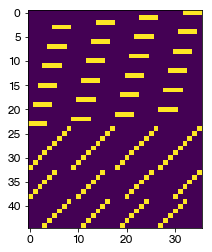

In [2]:
filename = direc + 'four-in-a-rows.txt'
data = open(filename).read().splitlines()
fours = np.array([list(format(int(i,16), '#038b')[2:]) for i in data]).astype(int)
plt.imshow(fours,interpolation='nearest')
plt.show()

In [3]:
def is_win(pieces):
    return np.any(np.dot(pieces,fours.T)==4)

In [4]:
def percent_non_terminal(n,m,N):
    x=np.array([1]*n+[2]*m+[0]*(36-n-m))
    k=0
    for i in range(N):
        np.random.shuffle(x)
        k+=(~is_win(x==1) and ~is_win(x==2))
    return k/N

def num_states(n,m):
    return math.factorial(36)/math.factorial(n)/math.factorial(m)/math.factorial(36-n-m)

In [5]:
ns = [num_states((n+1)//2,n//2) for n in range(0,37)]
pnt = [percent_non_terminal((n+1)//2,n//2,10000) for n in range(0,37)]
x = [np.sum([percent_non_terminal((n+1)//2,n//2,1000)*ns[n] for n in range(0,37)])
    for i in range(1000)]


C:\Users\Bas\Anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1121: UserWarning: 'HelveticaNeueLTStd-Ex_0.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


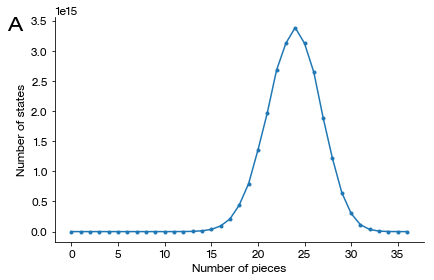

In [21]:
fig,ax = plt.subplots()

ax.plot(ns,'.-')
ax.set_xlabel('Number of pieces')
ax.set_ylabel('Number of states')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.text(0.02, 0.9, 'A', horizontalalignment='center',
        verticalalignment='center', transform=fig.transFigure, fontsize = 20)
fig.tight_layout()
fig.savefig(fig_direc + 'Non_terminal_states_A.pdf')
plt.show()

C:\Users\Bas\Anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1121: UserWarning: 'HelveticaNeueLTStd-Ex_0.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


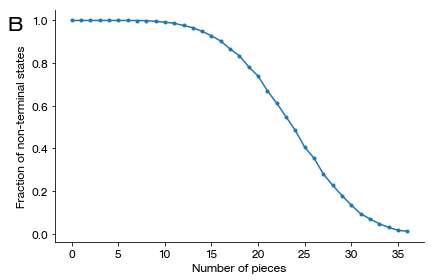

In [24]:
fig,ax = plt.subplots()

ax.plot(pnt,'.-')
ax.set_xlabel('Number of pieces')
ax.set_ylabel('Fraction of non-terminal states')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.text(0.02, 0.9, 'B', horizontalalignment='center',
        verticalalignment='center', transform=fig.transFigure, fontsize = 20)
fig.tight_layout()
fig.savefig(fig_direc + 'Non_terminal_states_B.pdf')
plt.show()

C:\Users\Bas\Anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1121: UserWarning: 'HelveticaNeueLTStd-Ex_0.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


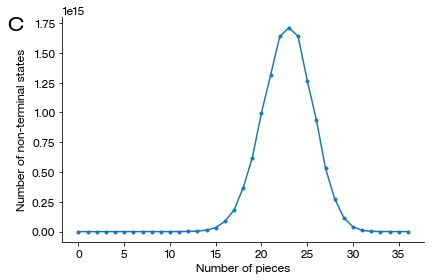

In [27]:
fig,ax = plt.subplots()

ax.plot([a*b for a,b in zip(ns,pnt)],'.-')
ax.set_xlabel('Number of pieces')
ax.set_ylabel('Number of non-terminal states')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.text(0.02, 0.9, 'C', horizontalalignment='center',
        verticalalignment='center', transform=fig.transFigure, fontsize = 20)
fig.tight_layout()
fig.savefig(fig_direc + 'Non_terminal_states_C.pdf')
plt.show()

C:\Users\Bas\Anaconda3\lib\site-packages\matplotlib\backends\backend_pdf.py:1121: UserWarning: 'HelveticaNeueLTStd-Ex_0.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


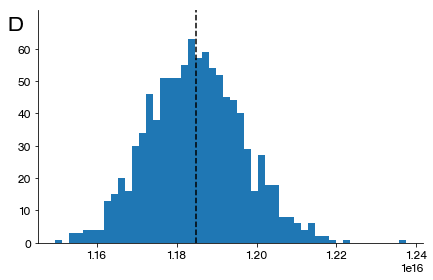

1.18483680152e+16 ± 3.75574780327e+12


In [39]:
fig,ax = plt.subplots()

ax.hist(x,50)
ax.axvline(x=np.mean(x), color='black', linestyle = 'dashed')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.text(0.02, 0.9, 'D', horizontalalignment='center',
        verticalalignment='center', transform=fig.transFigure, fontsize = 20)
ax.set_ylim([0,72])
ax.set_yticks(np.arange(0,70,10))
fig.tight_layout()
fig.savefig(fig_direc + 'Non_terminal_states_D.pdf')
plt.show()

print(np.mean(x),"±",stats.sem(x))